<a href="https://colab.research.google.com/github/pedrogfsilva/Gridworld-para-gera-o-de-rotas-com-Programa-o-Din-mica/blob/main/Gridworld_para_gera%C3%A7%C3%A3o_de_rotas_com_Programa%C3%A7%C3%A3o_Din%C3%A2mica_Pedro_Silva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Instalação e importação das bibliotecas utilizadas no código

In [ ]:
# instalando a biblioteca matplotlib para visualizar o grid
!pip install matplotlib

In [ ]:
# importando matplotlib, numpy e random que nos ajuda a visualizar o grid, manipular o grid e a gerar números aleatórios, respectivamente
import matplotlib.pyplot as plt
import numpy as np
import random

Implementação do grid e Função para visualização do grid

In [ ]:
def desenhar_grid(grid):
    # Defini o tamanho da figura, no nosso caso de 8x8
    plt.figure(figsize=(8, 8))

    # Desenha as linhas do grid
    for i in range(len(grid) + 1):
        plt.axhline(i, color='black', lw=1)
        plt.axvline(i, color='black', lw=1)

    # Preenche as células do grid
    for i in range(len(grid)):
        for j in range(len(grid[i])):
            if grid[i][j] == 1:  # Definindo célula de inicio com a cor azul
                plt.fill_between([j, j + 1], [i, i], [i + 1, i + 1], color='blue')
            elif grid[i][j] == 2:  # Definindo a montanha com a cor cinza
                plt.fill_between([j, j + 1], [i, i], [i + 1, i + 1], color='grey')
            elif grid[i][j] == 3:  # Definindo a areia movediça com a cor vermelha
                plt.fill_between([j, j + 1], [i, i], [i + 1, i + 1], color='red')
            elif grid[i][j] == 4:  # Definindo célula de chegada com a cor verde
                plt.fill_between([j, j + 1], [i, i], [i + 1, i + 1], color='green')

    # Configura os limites do gráfico
    plt.xlim(0, len(grid))
    plt.ylim(0, len(grid))
    plt.gca().invert_yaxis()
    plt.show()

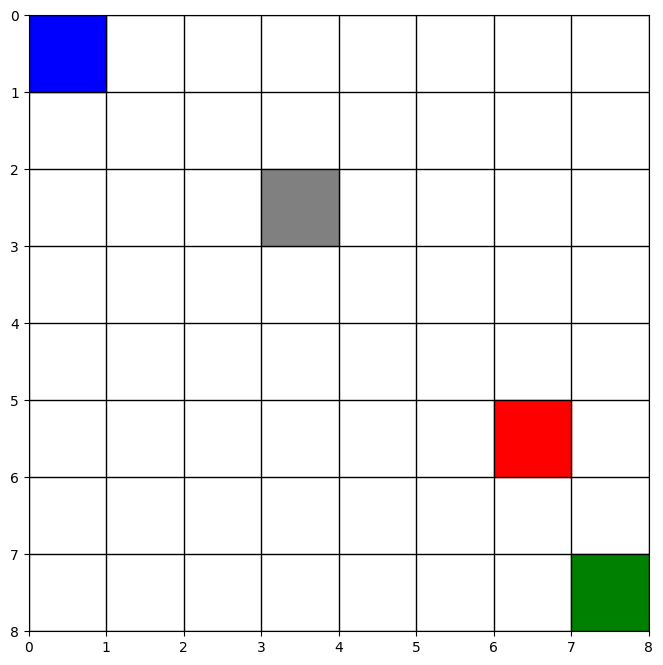

In [ ]:
# Grid de 8x8
grid = np.zeros((8, 8))

# Definindo as células de inicio (1), montanha (2), areia movediça (3) e célula de chegada (4)
grid[0, 0] = 1  # Célula de inicio
grid[2, 3] = 2  # Célula de montanha
grid[5, 6] = 3  # Célula de areia movediça
grid[7, 7] = 4 # Célula de chegada

# Desenha o grid
desenhar_grid(grid)

Função com o conjunto de ações que o agente pode realizar

In [ ]:
# Ações possíveis
acoes = ['cima', 'baixo', 'esquerda', 'direita']

# Função para atualizar a posição do agente
def mover_agente(posicao, acao):
    if acao == 'cima':
        return (max(posicao[0] - 1, 0), posicao[1])
    elif acao == 'baixo':
        return (min(posicao[0] + 1, len(grid) - 1), posicao[1])
    elif acao == 'esquerda':
        return (posicao[0], max(posicao[1] - 1, 0))
    elif acao == 'direita':
        return (posicao[0], min(posicao[1] + 1, len(grid) - 1))
    else:
        return posicao

# Testando a função
agente_posicao = (4, 4)
nova_posicao = mover_agente(agente_posicao, acoes[3])
print(f'Posição original: {agente_posicao}, Nova posição: {nova_posicao}')

Posição original: (4, 4), Nova posição: (4, 5)


Função com as recompensas

In [ ]:
def receber_recompensa(estado, grid):
    x, y = estado
    if grid[x, y] == 2: # Recompensa de -10 caso encontre a montanha
        return [-10, "Montanha"]
    elif grid[x, y] == 3: # Recompensa de -100 caso chegue na areia movediça
        return [-100, "Areia movediça"]
    elif grid[x, y] == 4:  # Recompensa de 100 caso chegue ao ponto de chegada
        return [100, "Ponto de chegada"]
    else:
        return [-1, "Estado normal"]  # Custo para se mover

# Testando a função de receber recompensa
estado = (7, 7)
recompensa = receber_recompensa(estado, grid)
print(f'Recompensa de: {recompensa[0]} por chegar ao estado: {recompensa[1]}')

Recompensa de: 100 por chegar ao estado: Ponto de chegada


 Função com a Lógica do Agente e Condições de parada

In [ ]:
# método auxiliar
def obter_acoes(estado, grid):
    acoes = []
    x, y = estado
    if x > 0:
        acoes.append(('esquerda', (x - 1, y)))
    if x < grid.shape[0] - 1:
        acoes.append(('direita', (x + 1, y)))
    if y > 0:
        acoes.append(('cima', (x, y - 1)))
    if y < grid.shape[1] - 1:
        acoes.append(('baixo', (x, y + 1)))
    return acoes

# método que executa a lógica do agente, o agente se move aleatoriamente pelo grid até atingir um número máximo de etapas
# ou até chegar a montanha, areia movediça ou o ponto de chegada
def logica_do_agente(estado_inicial, grid, passos_maximos=50):
    estado_atual = estado_inicial
    recompensa_total = 0
    numero_passos = 0

    while numero_passos < passos_maximos:
        acoes = obter_acoes(estado_atual, grid)
        if not acoes:
            break  # Não há ações disponíveis

        # Escolhe uma ação aleatoriamente
        acao, proximo_estado = random.choice(acoes)

        # Atualiza o estado e a recompensa total
        estado_atual = proximo_estado
        recompensa = receber_recompensa(estado_atual, grid)
        recompensa_total += recompensa[0]
        numero_passos += 1

        # Verifica as condições de parada
        if grid[estado_atual[0], estado_atual[1]] == 2:  # Montanha
            print("Agente atingiu a montanha!")
            break
        elif grid[estado_atual[0], estado_atual[1]] == 3:  # Areia movediça
            print("Agente caiu na areia movediça!")
            break
        elif grid[estado_atual[0], estado_atual[1]] == 4:  # Objetivo
            print("Agente alcançou o objetivo!")
            break

    return recompensa_total

# Testando o método criado acima
estado_inicial = (0, 0)
recompensa_total = logica_do_agente(estado_inicial, grid)
print(f"Recompensa total: {recompensa_total}")

Recompensa total: -50
